# ***Proyecto DS Parte I: Visualizaciones e interpretaciones de las 5 principales ligas europeas de fútbol.***

# **Hipotesis**

**La hipótesis principal que se busca abordar en este trabajo es que los jugadores de las principales 5 ligas europeas de fútbol encuentran su óptimo de rendimiento entre los 23 y 27 años.**

Las hipótesis secundarias abordan los siguientes temas:

- Las ligas en las que haya más jugadores dentro de este rango etario experimentarán una mayor cantidad de goles y asistencias.


- Los defensores en promedio convierten más goles de los que se esperan ya que por su posición en el campo de juego no están acostumbrados a tener tantas oportunidades y muchos de sus goles provienen de pelota parada.


### **Origen de los datos**

Para lograr esto, decidí utilizar un dataset obtenido de Kaggle (https://www.kaggle.com/datasets/orkunaktas/all-football-players-stats-in-top-5-leagues-2324/data). En el mismo se detallan datos de todos los jugadores de las 5 principales ligas de fútbol de Europa durante la temporada 23/24. Las variables a tener en cuenta son las siguientes:


* Rk: ID
* Player: El nombre del jugador.
* Nation: La nacionalidad del jugador.
* Pos: La posición del jugador (por ejemplo, delantero, mediocampista, defensor).
* Age: La edad del jugador.
* Squad: Equipo
* Comp: Liga
* Born: Año de nacimiento
* MP (Partidos Jugados): Número total de partidos jugados.
* Starts: Número de partidos en los que el jugador fue titular.
* Min: Minutos totales jugados por el jugador (puede ser igual que PJ).
* 90s (90 minutos jugados): El equivalente de partidos jugados de 90 minutos por el jugador (por ejemplo, 1.5 = 135 minutos).
* Gls: Número total de goles anotados por el jugador.
* Ast: Número total de asistencias realizadas por el jugador.
* G+A (Goles + Asistencias): Total de goles y asistencias combinados.
* G-PK (Goles sin penales): Número total de goles excluyendo los penales.
* PK (Penales): Número de goles anotados de penal por el jugador.
* PKatt (Penales intentados): Número de penales intentados por el jugador.
* CrdY (Tarjetas Amarillas): Número de tarjetas amarillas recibidas por el jugador.
* CrdR (Tarjetas Rojas): Número de tarjetas rojas recibidas por el jugador.
* xG (Goles Esperados): El número esperado de goles según los disparos del jugador.
* npxG (Goles Esperados sin Penales): Goles esperados excluyendo los penales.
* xAG (Asistencias Esperadas): El número esperado de asistencias según los pases del jugador.
* npxG+xAG (Goles Esperados sin Penales + Asistencias Esperadas): Total de goles esperados sin penales y asistencias esperadas.
* Conducciones Progresivas (PrgC): Número de veces que el jugador llevó el balón hacia adelante.
* PrgP (Pases Progresivos): Número de pases hechos por el jugador que movieron el balón hacia adelante.
* PrgR (Carreras Progresivas): Número de veces que el jugador hizo carreras hacia adelante con el balón.
* Gls (Goles): (Repetido, ya definido) Número total de goles anotados.
* Ast (Asistencias): (Repetido, ya definido) Número total de asistencias realizadas.
* G+A (Goles + Asistencias): (Repetido, ya definido) Total de goles y asistencias combinados.
* G-PK (Goles sin penales): (Repetido, ya definido) Goles anotados excluyendo penales.
* G+A-PK (Goles + Asistencias sin penales): Total de goles y asistencias, menos los goles de penal.
* xG (Goles Esperados): (Repetido, ya definido) Número esperado de goles según los disparos del jugador.
* xAG (Asistencias Esperadas): (Repetido, ya definido) Número esperado de asistencias según los pases del jugador.
* xG+xAG (Goles Esperados + Asistencias Esperadas): Total de goles esperados y asistencias esperadas.
* npxG (Goles Esperados sin Penales): (Repetido, ya definido) Goles esperados excluyendo penales.
* npxG+xAG (Goles sin Penales + Asistencias Esperadas): Total de goles esperados sin penales y asistencias esperadas.
* Gls_90: Goles cada 90 minutos.
* Ast_90: Asistencias cada 90 minutos.
* G+A_90: Goles + Asistencias cada 90 minutos.
* G-PK_90: Goles sin penales cada 90 minutos.
* xG_90: Goles esperados cada 90 minutos.
* xAG_90: Asistencias esperadas cada 90 minutos.
* xG+xAG_90: Goles + asistencias esperadas cada 90 minutos.
* npxG_90: Goles (no penales) esperados cada 90 minutos.
* npxG+xAG_90: Goles (no penales) + asistencias esperadas cada 90 minutos



# **Codigo**

In [1]:
# Lo primero que hago es importar las librerias que voy a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif, f_regression
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.datasets import load_iris
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [2]:
# Cargo los datos del archivo que voy a utilizar
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Coderhouse/top5-players.csv')
df

Mounted at /content/drive


,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Gls_90,Ast_90,G+A_90,G-PK_90,G+A-PK_90,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90
0,1,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,23.0,2000.0,20,13,...,0.00,0.07,0.07,0.00,0.07,0.00,0.06,0.06,0.00,0.06
1,2,Brenden Aaronson,us USA,"MF,FW",Union Berlin,de Bundesliga,22.0,2000.0,30,14,...,0.14,0.14,0.28,0.14,0.28,0.14,0.13,0.27,0.14,0.27
2,3,Paxten Aaronson,us USA,MF,Eint Frankfurt,de Bundesliga,19.0,2003.0,7,1,...,0.00,0.89,0.89,0.00,0.89,0.11,0.07,0.19,0.11,0.19
3,4,Keyliane Abdallah,fr FRA,FW,Marseille,fr Ligue 1,17.0,2006.0,1,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,5,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,35.0,1987.0,31,31,...,0.13,0.00,0.13,0.10,0.10,0.11,0.01,0.12,0.09,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2847,2848,Lovro Zvonarek,hr CRO,"FW,MF",Bayern Munich,de Bundesliga,18.0,2005.0,5,1,...,0.55,0.00,0.55,0.55,0.55,0.04,0.12,0.15,0.04,0.15
2848,2849,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,24.0,1998.0,35,35,...,0.23,0.29,0.52,0.17,0.47,0.22,0.28,0.50,0.17,0.45
2849,2850,Milan Đurić,ba BIH,FW,Hellas Verona,it Serie A,33.0,1990.0,20,13,...,0.37,0.07,0.45,0.30,0.37,0.34,0.09,0.43,0.16,0.25
2850,2851,Milan Đurić,ba BIH,FW,Monza,it Serie A,33.0,1990.0,17,13,...,0.29,0.07,0.36,0.29,0.36,0.21,0.05,0.26,0.21,0.26


In [3]:
# Reviso el tamaño del data set
df.shape

(2852, 37)

In [4]:
# Reviso el tipo de datos por columna
df.dtypes

,0
Rk,int64
Player,object
Nation,object
Pos,object
Squad,object
Comp,object
Age,float64
Born,float64
MP,int64
Starts,int64


In [5]:
# Reviso si hay valores en cero para luego reemplazarlos por NaN
df.isnull().sum()

,0
Rk,0
Player,0
Nation,3
Pos,0
Squad,0
Comp,0
Age,4
Born,4
MP,0
Starts,0


In [6]:
df.replace(0, np.nan, inplace=True)
df

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Gls_90,Ast_90,G+A_90,G-PK_90,G+A-PK_90,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90
0,1,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,23.0,2000.0,20,13.0,...,NaN,0.07,0.07,NaN,0.07,NaN,0.06,0.06,NaN,0.06
1,2,Brenden Aaronson,us USA,"MF,FW",Union Berlin,de Bundesliga,22.0,2000.0,30,14.0,...,0.14,0.14,0.28,0.14,0.28,0.14,0.13,0.27,0.14,0.27
2,3,Paxten Aaronson,us USA,MF,Eint Frankfurt,de Bundesliga,19.0,2003.0,7,1.0,...,NaN,0.89,0.89,NaN,0.89,0.11,0.07,0.19,0.11,0.19
3,4,Keyliane Abdallah,fr FRA,FW,Marseille,fr Ligue 1,17.0,2006.0,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,35.0,1987.0,31,31.0,...,0.13,NaN,0.13,0.10,0.10,0.11,0.01,0.12,0.09,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2847,2848,Lovro Zvonarek,hr CRO,"FW,MF",Bayern Munich,de Bundesliga,18.0,2005.0,5,1.0,...,0.55,NaN,0.55,0.55,0.55,0.04,0.12,0.15,0.04,0.15
2848,2849,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,24.0,1998.0,35,35.0,...,0.23,0.29,0.52,0.17,0.47,0.22,0.28,0.50,0.17,0.45
2849,2850,Milan Đurić,ba BIH,FW,Hellas Verona,it Serie A,33.0,1990.0,20,13.0,...,0.37,0.07,0.45,0.30,0.37,0.34,0.09,0.43,0.16,0.25
2850,2851,Milan Đurić,ba BIH,FW,Monza,it Serie A,33.0,1990.0,17,13.0,...,0.29,0.07,0.36,0.29,0.36,0.21,0.05,0.26,0.21,0.26


# Gráficos para acompañar la hipótesis principal
- Los jugadores de las principales 5 ligas europeas de fútbol encuentran su óptimo de rendimiento en ataque entre los 23 y 27 años.

Revisando los tres gráficos que adjunto a continuación podemos evidenciar que los jugadores dentro del rango etario mencionado han realizado la mayoría de los goles y asistencias de las principales ligas europeas. Si bien, el aporte de otro rangos etarios es importante, hay cuatro años en los cuales el futbolista profesional experimenta un óptimo de performance y es transversal a las ligas estudiadas.

Vale la pena hacer mención a la cantidad de goles convertidos por jugadores del rango etario menor en la Ligue 1 (Liga Francesa) ya que es cercana en cuanto cantidad de goles y asistencias, a la del grupo estudiado. Esto se debe a que la población de jugadores pertenecientes a dicho rango etario es más alto que en el resto de la liga. Abordaré este punto en la siguiente hipótesis.

<ipython-input-7-e7a9cc010f35>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  goles_por_edad = df.groupby('Rango Etario')['Gls'].sum().reset_index()


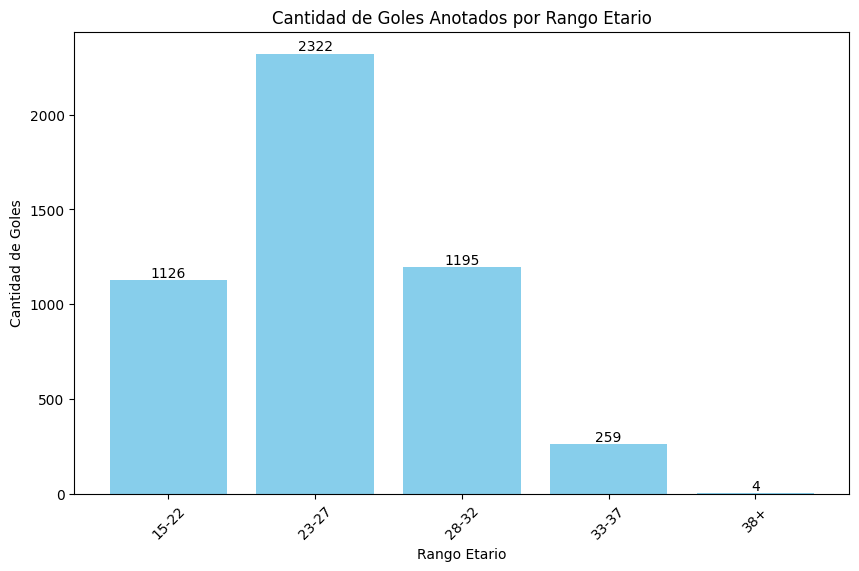

In [7]:
# Gráfico hecho con Matplotlib
# En este gráfico quiero ver los goles convertidos por rango etario
age_bins = [15, 22, 27, 32, 37, 100]
age_labels = ['15-22', '23-27', '28-32', '33-37', '38+']
df['Rango Etario'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Agrupo por rango etario y sumo los goles
goles_por_edad = df.groupby('Rango Etario')['Gls'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(goles_por_edad['Rango Etario'], goles_por_edad['Gls'], color='skyblue')
bars = plt.bar(goles_por_edad['Rango Etario'], goles_por_edad['Gls'], color='skyblue')

# Añadir los totales encima de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.title('Cantidad de Goles Anotados por Rango Etario')
plt.xlabel('Rango Etario')
plt.ylabel('Cantidad de Goles')
plt.xticks(rotation=45)
plt.show()

<ipython-input-8-2ffe996b6354>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  asistencias_por_edad = df.groupby('Rango Etario')['Ast'].sum().reset_index()


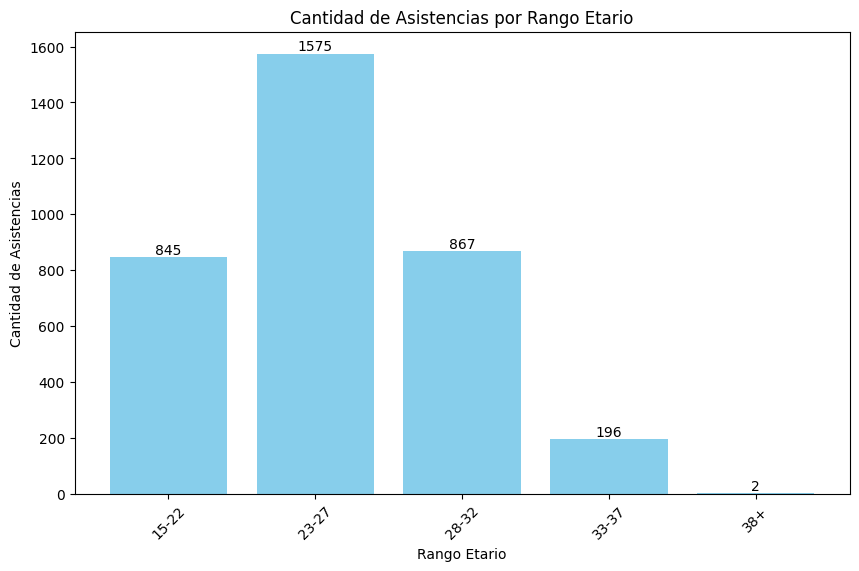

In [8]:
# Gráfico hecho con Matplotlib
# Asistencias realizadas por rango etario
age_bins = [15, 22, 27, 32, 37, 100]
age_labels = ['15-22', '23-27', '28-32', '33-37', '38+']
df['Rango Etario'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Agrupo por rango etario y sumo las asistencias
asistencias_por_edad = df.groupby('Rango Etario')['Ast'].sum().reset_index()

plt.figure(figsize=(10, 6))
bars = plt.bar(asistencias_por_edad['Rango Etario'], asistencias_por_edad['Ast'], color='skyblue')

# Agrego los totales encima de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

plt.title('Cantidad de Asistencias por Rango Etario')
plt.xlabel('Rango Etario')
plt.ylabel('Cantidad de Asistencias')
plt.xticks(rotation=45)
plt.show()

<ipython-input-9-8d4b6805084c>:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = df.pivot_table(values='G+A', index='Comp', columns='Rango Etario', aggfunc='sum')


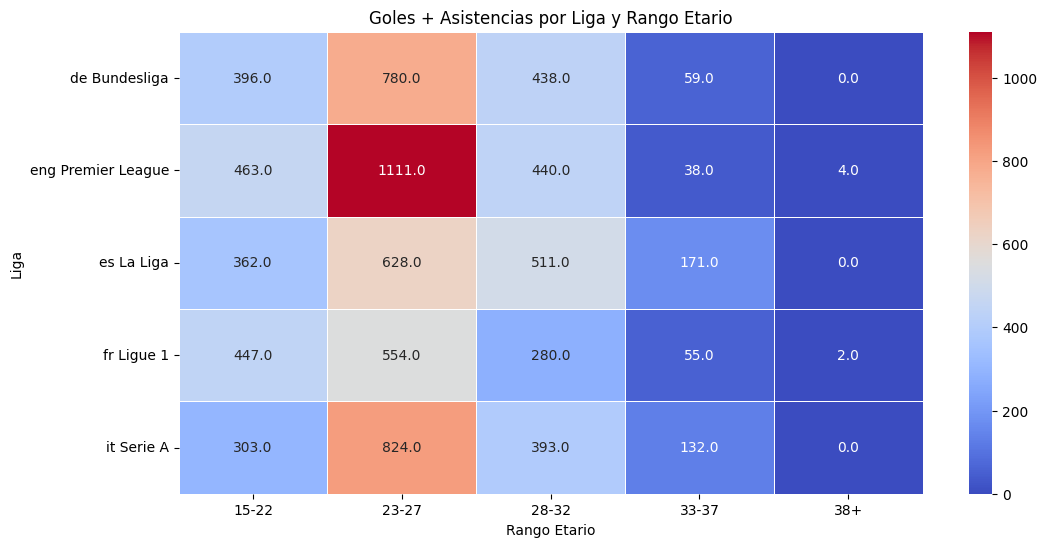

In [9]:
#Grafico realizado con Matplotlib y Seaborn

age_bins = [15, 22, 27, 32, 37, 100]
age_labels = ['15-22', '23-27', '28-32', '33-37', '38+']
df['Rango Etario'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Organizo los datos en el gráfico
heatmap_data = df.pivot_table(values='G+A', index='Comp', columns='Rango Etario', aggfunc='sum')

# Grafico el HeatMap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='.1f', linewidths=.5)

# Termino con la personalización del gráfico
plt.title('Goles + Asistencias por Liga y Rango Etario')
plt.xlabel('Rango Etario')
plt.ylabel('Liga')
plt.show()

# Graficos para acompañar las hipótesis secundarias
- Las ligas en las que haya más jugadores en este rango etario (23-27)
experimentarán una mayor cantidad de goles y asistencias.

Tal como lo podemos evidenciar en los gráficos presentandos, todas las ligas que tienen una mediana de 25 años muestran mejores valores en terminos de goles y asistencias que la Ligue 1 (Liga Francesa), cuya mediana es de 23. Tal como lo mencionaba anteriormente, esto se debe principalmente a que la mitad de los jugadores que participan en dicha liga, tienen 23 años o menos, lo que los remueve del rango óptimo de performance analizado en la hipótesis anterior.

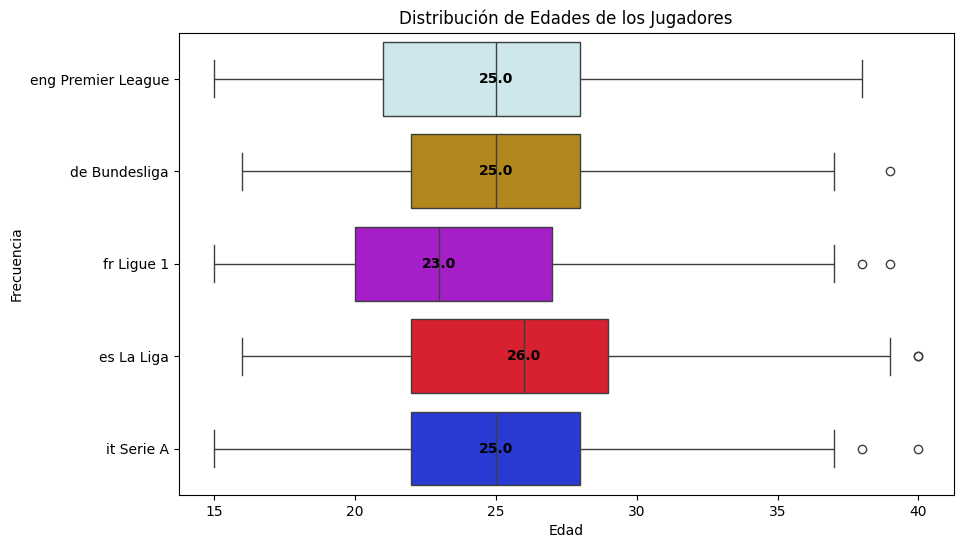

In [10]:
# Gráfico hecho con Matplotlib y Seaborn
# Primero vuelvo a definir los colores por liga

palette = {'eng Premier League': '#c9eaf0', 'de Bundesliga': '#c99206', 'fr Ligue 1': '#b602e3', 'it Serie A': '#0c23f0', 'es La Liga': '#f70217'}


plt.figure(figsize=(10, 6))
# Avanzo con la creación del gráfico de Boxplot
ax = sns.boxplot(data=df, x='Age', y='Comp', hue='Comp', palette=palette, legend=False)

# Calculo y muestro las medianas
for i, comp in enumerate(df['Comp'].unique()):
    median_age = df[df['Comp'] == comp]['Age'].median()
    ax.text(median_age, i, f'{median_age:.1f}', color='black', ha='center', va='center', fontsize=10, fontweight='bold')

plt.title('Distribución de Edades de los Jugadores')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

<ipython-input-11-d54a6a53d468>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Comp', y='Age', inner='quartile', palette=palette)


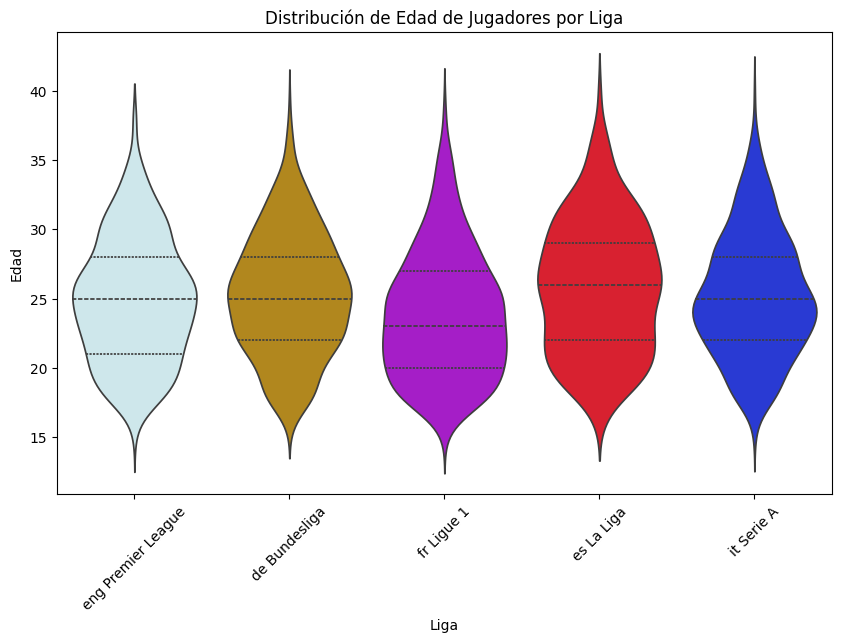

In [11]:
# Otro gráfico realizado con Matplotlib y Seaborn
# Vuelvo a definir los colores
palette = {'eng Premier League': '#c9eaf0', 'de Bundesliga': '#c99206', 'fr Ligue 1': '#b602e3', 'it Serie A': '#0c23f0', 'es La Liga': '#f70217'}

plt.figure(figsize=(10, 6))
# Gráfico de violín para ver la distribución de edad por liga con colores
sns.violinplot(data=df, x='Comp', y='Age', inner='quartile', palette=palette)
plt.title('Distribución de Edad de Jugadores por Liga')
plt.xlabel('Liga')
plt.ylabel('Edad')
plt.xticks(rotation=45)
plt.show()

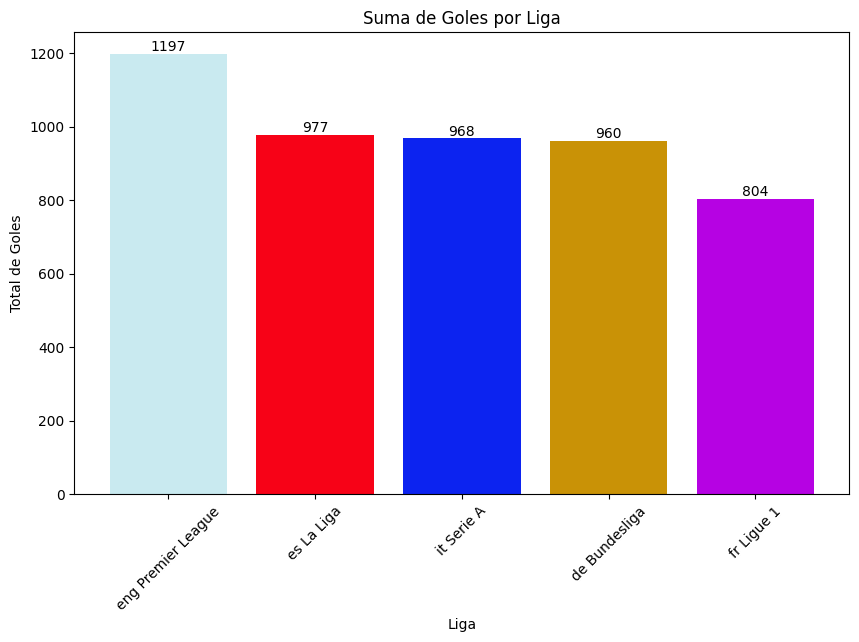

In [12]:
# Gráfico realizado con Matplotlib
# Vuelvo a definir los colores
colors = {'eng Premier League': '#c9eaf0', 'de Bundesliga': '#c99206', 'fr Ligue 1': '#b602e3', 'it Serie A': '#0c23f0', 'es La Liga': '#f70217'}
# Avanzo con la creación del gráfico, agrupando y acomodando los valores de los goles realizados de mayor a menor
goles_por_liga = df.groupby('Comp')['Gls'].sum().reset_index()
goles_por_liga.sort_values(by='Gls', ascending=False, inplace=True)
plt.figure(figsize=(10, 6))
bar_colors = [colors[liga] for liga in goles_por_liga['Comp']]
bars = plt.bar(goles_por_liga['Comp'], goles_por_liga['Gls'], color=bar_colors)
for bar in bars:
    yval = bar.get_height()  # Altura de la barra
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')
plt.bar(goles_por_liga['Comp'], goles_por_liga['Gls'], color=bar_colors)
plt.title('Suma de Goles por Liga')
plt.xlabel('Liga')
plt.ylabel('Total de Goles')
plt.xticks(rotation=45)
plt.show()

# Hipotesis 3:

- Los defensores en promedio convierten más goles de los que se esperan de ellos ya que por su posición en el campo de juego no están acostumbrados a tener tantas oportunidades y muchos de sus goles provienen de pelota parada.

A través del gráfico presentado, podemos interpretar que en promedio, los defensores suelen convertir más goles de los que se esperan que realicen (sin contar penales) ya que muchos de ellos se encuentran por encima de la línea de paridad. Esto probablemente se deba a que no ocupan una posición de ataque durante los partidos, evitando que aumenten sus probabilidades de convertir, y que sus goles provienen mayoritariemente de pelotas paradas.

<ipython-input-13-2295f07412c8>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=defensores_df, x='npxG', y='G-PK', palette='coolwarm', s=100)


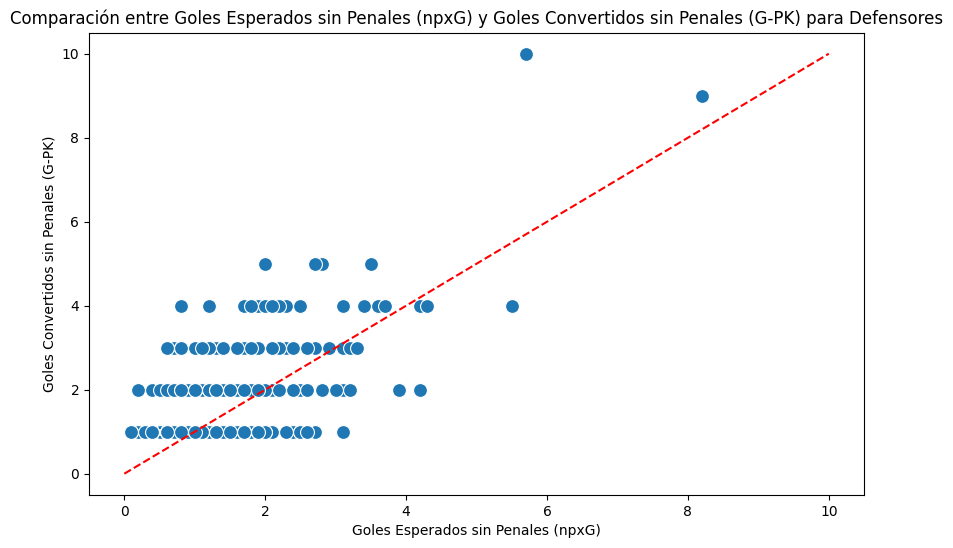

In [13]:
# Grafico creado con Matplotlib y Seaborn
# Primero filtro por los jugadores que son Defensores (Posición: DF)
defensores_df = df[df['Pos'] == 'DF']

# Avanzo con la creación el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=defensores_df, x='npxG', y='G-PK', palette='coolwarm', s=100)

max_val = max(defensores_df['npxG'].max(), defensores_df['G-PK'].max())  # Para que la línea cubra todo el gráfico
plt.plot([0, max_val], [0, max_val], color='red', linestyle='--', label='Referencia npxG = G-PK')

# Agrego el título y referecnias
plt.title('Comparación entre Goles Esperados sin Penales (npxG) y Goles Convertidos sin Penales (G-PK) para Defensores')
plt.xlabel('Goles Esperados sin Penales (npxG)')
plt.ylabel('Goles Convertidos sin Penales (G-PK)')

# Mostrar el gráfico
plt.show()

# ***Modelos de Machine Learning***

A través de dos modelos de Machine Learning voy a intentar dar sustento a la hipótesis principal de este trabajo, la cual sostiene que los jugadores de las principales 5 ligas europeas de fútbol encuentran su óptimo de rendimiento entre los 23 y 27 años.

# **Modelo Random Forest**

In [14]:
# Codifico las variables categóricas
df['Rango Etario_encoded'] = LabelEncoder().fit_transform(df['Rango Etario'])
df['Comp_encoded'] = LabelEncoder().fit_transform(df['Comp'])


# Verifico las clases asignadas para 'Rango Etario'
print("Codificación para 'Rango Etario':")
print(dict(enumerate(LabelEncoder().fit(df['Rango Etario']).classes_)))

# Verifico las clases asignadas para 'Comp'
print("\nCodificación para 'Comp':")
print(dict(enumerate(LabelEncoder().fit(df['Comp']).classes_)))

Codificación para 'Rango Etario':
{0: '15-22', 1: '23-27', 2: '28-32', 3: '33-37', 4: '38+', 5: nan}

Codificación para 'Comp':
{0: 'de Bundesliga', 1: 'eng Premier League', 2: 'es La Liga', 3: 'fr Ligue 1', 4: 'it Serie A'}


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Voy a definir de manera binaria si los jugadores estan o no en la edad "optima" y agregar las variables X que voy a tener en cuenta para el modelo:
# Creo la variable objetivo
df['Edad_optima'] = df['Age'].apply(lambda x: 1 if 23 <= x <= 27 else 0)
# Variables predictoras y objetivo
X = df[[ 'G+A','xG','xAG']]
y = df['Edad_optima']

In [17]:
print(X.shape)
print(y.shape)

(2852, 3)
(2852,)


In [18]:
df['Edad_optima'].value_counts()

,count
Edad_optima,
0,1758
1,1094


In [19]:
print(X.head())
print(y.head())

   G+A   xG  xAG
0  1.0  NaN  0.8
1  4.0  2.0  1.9
2  1.0  0.1  0.1
3  NaN  NaN  NaN
4  4.0  3.4  0.3
0    1
1    0
2    0
3    0
4    0
Name: Edad_optima, dtype: int64


In [20]:
# Separo en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
# Modelo de clasificación (Random Forest)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [22]:
# Predicciones y evaluación
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5621716287215411
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.76      0.67       331
           1       0.47      0.30      0.36       240

    accuracy                           0.56       571
   macro avg       0.53      0.53      0.51       571
weighted avg       0.54      0.56      0.54       571



# **Análisis y conclusiones del Modelo Random Forest**


- Accuracy: La precisión global del modelo es del 54.99%, lo cual indica que el modelo está acertando aproximadamente en el 55% de las predicciones. Dado que este valor está cercano al 50%, el modelo tiene dificultades para distinguir jugadores dentro y fuera de la "edad óptima".

- Classification Report:

 - Clase 0 (Jugadores fuera del rango óptimo):

   - Precision: El 59% de los jugadores que el modelo predice como fuera del rango óptimo realmente no están en el rango óptimo.

   - Recall: El modelo captura al 74% de los jugadores que están fuera del rango óptimo. Es decir, identifica mejor a los jugadores fuera del rango etario óptimo en comparación con los dentro del rango óptimo.

   - F1-Score: 0.66, una media entre precisión y sensibilidad, lo cual confirma que el modelo es más confiable al identificar correctamente a los jugadores fuera del rango.

 - Clase 1 (Jugadores en el rango óptimo):

   - Precision: El modelo solo acierta en un 44% cuando predice que un jugador está en el rango óptimo.

   - Recall: El modelo solo capta 28% de los jugadores en el rango óptimo. El modelo omite muchos jugadores que realmente están en el rango de edad óptimo.

   - F1-Score: Este 0.35 muestra que el modelo no es eficaz en la clase 1 y tiene problemas para identificar correctamente a los jugadores dentro del rango óptimo.

- Macro Avg y Weighted Avg: Estas métricas promedio indican que el modelo no se está comportando bien en términos generales y que tiene un sesgo hacia la clase 0 (fuera del rango), probablemente debido a la proporción de jugadores en y fuera del rango óptimo en el conjunto de datos.

**Interpretación General**

Estos resultados muestran que el modelo tiene dificultades para distinguir a los jugadores dentro del rango óptimo (23 a 27 años) usando las variables G+A (Goles + Asistencias), xG (Goles esperados) y xAG (Asistencias esperadas) como predictores. Esto puede ser porque las variables predictoras no son lo suficientemente útiles para distinguir si un jugador está en edad óptima (otras variables pueden ser necesarias para este análisis).



# **Modelo de Regresión logistica**

Clase 0 (fuera de rango): 1427
Clase 1 (dentro del rango): 1427
Accuracy: 0.532399299474606

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.61      0.60       331
           1       0.44      0.42      0.43       240

    accuracy                           0.53       571
   macro avg       0.52      0.52      0.52       571
weighted avg       0.53      0.53      0.53       571


Confusion Matrix:
[[203 128]
 [139 101]]


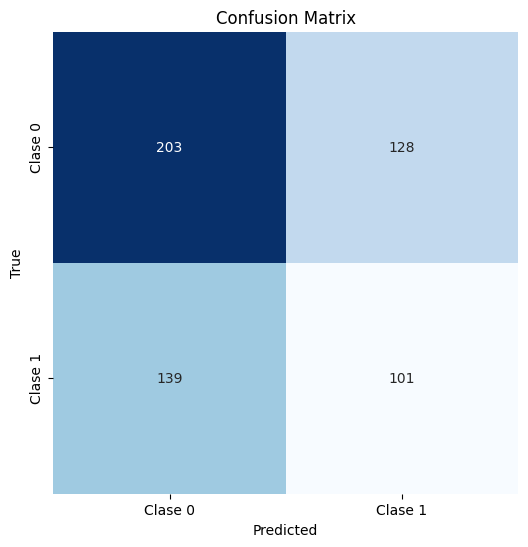

In [24]:
!pip install scikit-learn
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Variables predictoras y variable objetivo
X = df[['G+A', 'xG', 'xAG']]
y = df['Edad_optima']

# Divido los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Con este imputer reemplazo los NaaN con la media de la columna
imputer = SimpleImputer(strategy='mean')


X_train = imputer.fit_transform(X_train)

X_test = imputer.transform(X_test)

# Uso SMOTE para balancear las clases en el conjunto de entrenamiento
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Me ayuda a revisar que las clases hayan quedado balanceadas despues de haber usado SMOTE
print(f"Clase 0 (fuera de rango): {y_train_resampled.value_counts()[0]}")
print(f"Clase 1 (dentro del rango): {y_train_resampled.value_counts()[1]}")

# Entreno el modelo de regresión logística
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_resampled, y_train_resampled)

# Realizo predicciones en el conjunto de prueba
y_pred = log_reg.predict(X_test)

# Evalúo el modelo, agrego el reporte de clasificación y matriz de confusión
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Grafico la matriz de confusión
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=["Clase 0", "Clase 1"], yticklabels=["Clase 0", "Clase 1"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# **Analisis y conclusiones del modelo de regresión logística**

- El modelo acierta aproximadamente el 59% de las veces.

- Classification Report:

  - Precision:

     - Para Clase 0 (fuera de rango), la precisión es 0.62 lo que significa que el 62% de las veces que se predijo que un jugador no estaba en el rango de edad óptimo (23 a 27 años), fue correcto.

     - Para Clase 1 (dentro del rango), la precisión es 0.51. Esto significa que, de todas las veces que el modelo predijo que un jugador estaba en el rango óptimo, el 51% de esas predicciones fueron correctas. Esto muestra que el modelo tiene más dificultades para identificar correctamente a los jugadores en el rango de edad óptimo.

- Recall:

 - Para Clase 0 (fuera de rango), el recall es 0.75, lo que significa que el modelo logro identificar correctamente el 75% de los casos donde los jugadores no estaban en el rango de edad óptimo.

 - Para Clase 1 (dentro del rango), el recall es 0.36. Esto indica que el modelo solo detecta el 36% de los jugadores que están en el rango de edad óptimo, lo que es un valor bastante bajo.

- F1-Score:

 - Para Clase 0, el F1-score es 0.68, lo que indica un buen balance entre precisión y recall.

 - Para Clase 1, el F1-score es 0.43, lo que es bajo y muestra que, aunque el modelo predice algunas veces correctamente los jugadores en el rango óptimo, está dejando fuera muchas instancias correctas.

Interpretación General:

Al igual que con el modelo anterior, este modelo tiene dificultades para encontrar a los jugadores dentro del rango óptimo de edad (23 a 27 años) y es más confiable para predecir los jugadores que no están en el. Al igual que en el modelo anterior, es probable que las variables utilizadas no estén siendo las más eficaces para predecir a los jugadores que se encuentran dentro de este rango etario.



#**Conclusiones finales**


A modo de conclusión podemos decir que si bien los gráficos presentados al principio del trabajo acompañan a la principal hipótesis planteada en el proyecto, los dos modelos reflejan que la hipótesis de que el rendimiento óptimo se relaciona con el rango de edad de 23 a 27 años no se sostiene bien bajo las características actuales. Tal como lo menciono más arriba, esto puede ser por varias cuestiones, entre ellas la falta de relevancia de las variables seleccionadas para el modelo o inclusive la falta de variables más relevantes para sostener esta postura dentro de la base de datos seleccionada.